### Introduction

**Definition.** In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing as a `binary feature`. ***This can be extended to model several classes of events*** such as determining whether an image contains a cat, dog, wolf, etc. *Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.*

**Opening example.** Now we have a classification problem, we want to predict the binary output variable $Y$(2 values: either 1 or 0). For example, the case of flipping a coin (`Head`/`Tail`). The response $y_i$ is `binary`: `1` if the coin is `Head`, `0`  if the coin is `Tail`. This is represented by a `Bernoulli variable` where the probabilities are bounded on both ends (they must be between 0 and 1).

(20,)

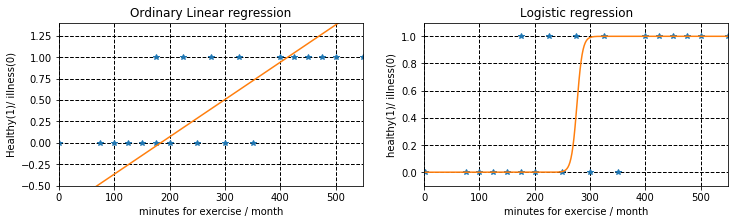

In [1]:
## -------------------- Hiden code again --------------------------------

`Linear regression` is only dealing with continuous variables instead of Bernoulli variables. The problem of `Linear Regression` is that these predictions are not sensible for classification since the true probability must fall between 0 and 1 but it can be larger than 1 or smaller than 0. 

- Noted that classification is not normally distributed which is violated the *normality assumption* in `Simple Linear Regression` : `"The error(residuals) follow a normal distribution."`

- Moreover, both mean and variance depend on the underlying probability. Any factor that affects the probability will change not just the mean but also the variance of the observations which means the variance is no longer constantly violating the assumption in `Homoscedasticity: "The variance of residual is the same for any value of X (Constant variance of errors)".`

**So…how can we predict a classificiation problem?**

Instead we can transform our liner regression to a logistic regression curve!

As we are now looking for a model for probabilities, we should ensure the model predicts values on the scale from 0 to 1. A powerful model `Generalised linear model (GLM)` caters to these situations by allowing for response variables that have arbitrary distributions (other than only normal distributions), and by using a link function to vary linearly with the predicted values rather than assuming that the response itself must vary linearly with the predictor. As a result, GLM offers extra flexibility in modelling. In this case, we need to apply the logistic function

**Quick reminder:** In the `linear regression` and `perceptron learning`, the output of prediction use an `activation function` at the core of the method

$$ \textbf{y} = f(\textbf{x}) $$

For example,

|                     | Linear regression                        |   | Perceptron learning                                              | Logistic regression                                             |
|---------------------|------------------------------------------|---|------------------------------------------------------------------|-----------------------------------------------------------------|
| activation function | $ \textbf{y} = \textbf{w}^T \textbf{x} $ |   | $\textbf{y} = \text{sgn} \left( \textbf{w}^T \textbf{x} \right)$ | $ \textbf{y} = \varphi \left( \textbf{w}^T \textbf{x} \right) $ |
| ranges of value     | $y_i \in \mathbb{R}$                     |   | $y_i \in \lbrace -1, 1 \rbrace$                                   | $y_i \in [0, 1]$                                                |


where $\varphi$ is called a `logistic function.`

**Example 1. Display some activation functions.** 

In this example; we introduce some activation functions

|    names    |          formula's actvation function          | range's values |  order of continuty  |
|:-----------:|:-----------------------------------:|:--------------:|:--------------------:|
| binary step | $\mathbb{I}_{[0, \infty)}(x)$       | $[0, 1]$       | $C^{-1}$'s class     |
| identity    | $Id_{x}$                            | $\mathbb{R}$   | $C^{\infty}$'s class |
| tanh        | $\dfrac{e^{s}-e^{-s}}{e^{s}-e^{-s}}$ | $[-1, 1]$      | $C^{\infty}$'s class |
| sigmoid     | $\dfrac{1}{1 + e^{-s}}$              | $[0, 1]$       | $C^{\infty}$'s class |
| RELU        | $\max \lbrace 0, x \rbrace$         | $[0, \infty)$  | $C^0$'s class        |

(-0.1, 4.1)

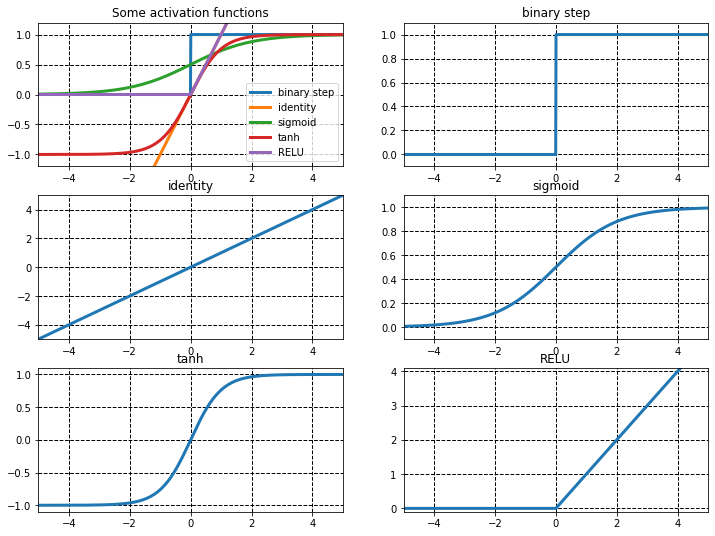

In [2]:
## ------------------------- Hiden code ----------------------------

**Logistic function.** In the `logistic regression problem` the respone values $\textbf{y}$ must be bounded in $[0, 1]$, so a `logistic function` $\varphi$ must be satisfied the following conditions:
- i) $\varphi$ be a continuous function and bounded in $[0, 1], \quad \forall s \in \mathbb{R}$
- ii) The limitations
$$ \lim_{s \to -\infty} \varphi(s) = 0 \text{ and } \lim_{s \to +\infty} \varphi(s) = 1 $$
- iii) $\varphi$ be smooth.

**Sigmoid function.** Defined by 
$$ \sigma(s) := \dfrac{1}{1 + e^{-s}} = \dfrac{e^s}{e^s + 1} $$
this function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits. Moreover, we have
$$ \sigma(s) = \dfrac{1}{2} \left( 1 + \tanh \left( \dfrac{s}{2} \right) \right) $$
and
$$ \sigma'(s) = \sigma(s) \left( 1 - \sigma(s) \right). $$

Noting that the `binary step function` only holds the 2 first conditions to become a logistic function.

### Logistic Regression 's loss function.
Firstly, for each $n = 1, \ldots, N,$ we suppose that

$$ \left\lbrace\begin{array}{ccc}
\mathbb{P}\left(y_{n}=1\left|\textbf{x}_{n},\textbf{w}\right.\right) & = & \varphi \left(\textbf{w}^{T}\textbf{x}_{n}\right)\\
\mathbb{P}\left(y_{n}=0\left|\textbf{x}_{n},\textbf{w}\right.\right) & = & 1 - \varphi\left(\textbf{w}^{T}\textbf{x}_{n}\right)
\end{array}\right. $$

Now, let $z_n = \varphi\left(\textbf{w}^{T}\textbf{x}_{n}\right)$ then we get
$$ \mathbb{P}\left(y_{n}\left|\textbf{x}_{n},\textbf{w}\right.\right) = z_{n}^{y_{n}}\left(1-z_{n}\right)^{1-y_{n}}, \forall n=1,\ldots,N, $$
and
$$ \mathbb{P}\left(\textbf{y} \left|\textbf{X},\textbf{w}\right.\right) = \mathbb{P}\left( y_1, \ldots, y_n \left| \textbf{X}, \textbf{w} \right. \right) $$
where $\textbf{X} = \left( \textbf{x}_1, \ldots, \textbf{x}_N \right) \in \mathbb{R}^{d \times N}$ be the matrix of whole observations in the training set. 

The `objective` is finding the coeficient $\textbf{w}^{*}$ to maximize $\mathbb{P}\left(\textbf{y} \left|\textbf{X},\textbf{w}\right.\right)$

$$ \textbf{w}^{*} = \underset{\textbf{w}}{\text{argmax}} \mathbb{P}\left(\textbf{y} \left|\textbf{X},\textbf{w}\right.\right) $$

To simplify this problem, we assume that the observations are mutually independent, hence

$$ \textbf{w}^{*} = \underset{\textbf{w}}{\text{argmax}} \prod_{n=1}^N \mathbb{P}\left( y_n \left|\textbf{x}_n, \textbf{w} \right.\right) = \underset{\textbf{w}}{\text{argmax}} \prod_{n=1}^N z_{n}^{y_{n}}\left(1-z_{n}\right)^{1-y_{n}} $$

By considering 
$$ \mathcal{L} \left( \textbf{w} \right) = - \log \mathbb{P}\left( y_n \left|\textbf{x}_n, \textbf{w} \right.\right) = \sum_{n=1}^N \left( y_n \log\left( z_n\right) + \left( 1 -y_n \right) \log\left( 1- z_n\right) \right) $$
as the **`loss function`**, so the `maximum likelihood problem` becomes finding $\textbf{w}^{*}$ to minimize the loss function :
$$ \textbf{w}^{*} = \underset{\textbf{w}}{\text{argmin}} \left[ - \sum_{n=1}^N \left( y_n \log\left( z_n\right) + \left( 1 -y_n \right) \log\left( 1- z_n\right) \right) \right] $$



**Why using the sigmoid function?**

Remind that $z_n = \varphi\left(\textbf{w}^{T}\textbf{x}_{n}\right)$, so we have
$$ \dfrac{\partial\mathcal{L}}{\partial\textbf{w}}\left(\textbf{w},\textbf{x}_{n},y_{n}\right)=-\left(\dfrac{y_{n}}{z_{n}}-\dfrac{1-y_{n}}{1-z_{n}}\right)\dfrac{\partial z_{n}}{\partial\textbf{w}} = \dfrac{z_{n}-y_{n}}{z_{n}\left(1-z_{n}\right)}\dfrac{\partial z_{n}}{\partial\textbf{w}} ,\quad\forall n=1,\ldots,N $$

Let $s = \textbf{w}^T \textbf{x}$ then using the `composite function rule` of `derivaties`, we obtain

$$ \dfrac{\partial z_{n}}{\partial \textbf{w}} = \dfrac{\partial z_{n}}{\partial s} \dfrac{\partial s}{\partial\textbf{w}} = \left( \varphi'(s) \right) \textbf{x} $$

hence

$$ \dfrac{\partial\mathcal{L}}{\partial\textbf{w}}\left(\textbf{w},\textbf{x}_{n},y_{n}\right) = \dfrac{z_{n}-y_{n}}{z_{n}\left(1-z_{n}\right)} \left( \varphi'(s) \right) \textbf{x},\quad\forall n=1,\ldots,N $$

To simplify the right hand side to $\textbf{x} \left( z_{n} - y_{n} \right)$, we must find the `activation funtion` $\varphi$ such that

$$ \varphi'(s) = z \left( 1 - z \right) $$

Solve this O.D.E, we obtain

$$ \begin{array}{cccc}
 & \dfrac{d z}{d s} & = & z\left(1-z\right)\\
\Rightarrow & \left(\dfrac{1}{z}-\dfrac{1}{1-z}\right)dz & = & ds\\
\Rightarrow & \log\left(\dfrac{z}{1-z}\right) & = & s\\
\Rightarrow & z & = & \dfrac{1}{1+e^{-s}}
\end{array} $$

and hence that is why we use the `sigmoid` function in the `logistic regression.`

**The optimal w.**
Finally, using the `SGD's algorithm`

$$ \left\lbrace\begin{array}{cclr}
\textbf{w} & = & \textbf{w}_0  & \text{(initialize)} \\
\textbf{w}_k & = & \textbf{w}_{k-1} + \eta \left[ \textbf{x} \left( z_{n} - y_{n} \right) \right] & \text{(iterate)} \\
\end{array}\right. $$

**Example 1. Univariate Logistic Regression.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

df = pd.read_excel(r"C:\Users\Admin\Desktop\Nhan_pro\Data\ML\water-plant.xlsx")
df.head()

,water amount (gallon pots),target
0,17,1
1,13,1
2,19,1
3,18,1
4,16,1


The dataset describe the "`How does water affect a plant growth?`". As we known, there are three potential situations with water: `too much, too little` and, of course, `just enough`. The dataset has 2 columns:
- `water amount (gallon pots)`: (int) - the number of the `gallon-pots` per month for a flower-plant.
- `target`: the observations (plants) growth good (1) or not (0)?
- There are 974 observations in this dataset.

In [4]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
X = df['water amount (gallon pots)'].values
y = df['target'].values
logreg.fit(X.reshape(-1, 1), y)
logreg.coef_, logreg.intercept_

(array([[-0.72804834]]), array([13.22124824]))

This meant `y = sigmoid(13.22 - 0.728*x)` or

$$ \begin{array}{cll} w_1 &\approx& -0.728 \\ w_0 & \approx & 12.221 \\ y_n &=& \dfrac{1}{1 + \exp \left( w_0 + w_1 \textbf{x}_n \right) } \end{array}, \quad \forall n = 1, \ldots, N $$

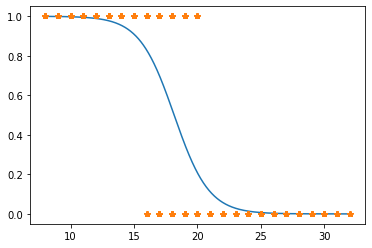

In [5]:
t = np.linspace(X.min(), X.max(), 1000)
s = logreg.intercept_ + logreg.coef_ * t
s = s.reshape(-1,1)
f = 1/(1 + np.exp(-s))
plt.plot(t, f)
plt.plot(X, y, '*')

In [6]:
from sklearn.model_selection import train_test_split
X = df['water amount (gallon pots)'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 250, random_state=23)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

from sklearn.metrics import accuracy_score, confusion_matrix
print("train acc: ", accuracy_score(y_train, logreg.predict(X_train)))
print("train acc: ", accuracy_score(y_test, logreg.predict(X_test)))

train acc:  0.8573333333333333
train acc:  0.832


**Model Evaluation using Confusion Matrix.**

- A `confusion matrix` is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

- Now using **`heatmap`** to display this matrix

Text(0.5, 257.44, 'Predicted label')

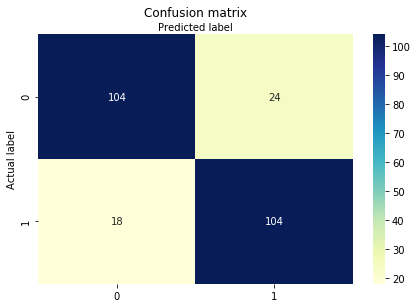

In [7]:
import seaborn as sns

cnf_matrix = confusion_matrix(y_test, logreg.predict(X_test))
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The dimension of this matrix is `2x2` because this model is binary classification. We have two classes 0 and 1; the `diagonal values` represent `accurate predictions`, while `non-diagonal` elements are `inaccurate predictions`. In the output, 104 and 104 are actual predictions, and 26 and 11 are incorrect predictions.

-----------------------
**Remarks.** In this section, we don't focus on the `affects` of choosing `C` or the `penalty function` to the accuracy; this will be discuss on another section; named `overfiting; regulization & cross validation.`

-----------------------

**Example 2. Iris dataset** Firstly, we take $\textbf{X}$ contains whole `4` features

In [8]:
from sklearn.datasets import *
iris = load_iris()

X = iris.data[50 :]
y = iris.target[:100]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 22)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
print("train acc: ", accuracy_score(y_train, logreg.predict(X_train)))
print("train acc: ", accuracy_score(y_test, logreg.predict(X_test)))

train acc:  0.9733333333333334
train acc:  0.92


In [9]:
cnf_matrix = confusion_matrix(y_test, logreg.predict(X_test))
cnf_matrix

array([[10,  2],
       [ 0, 13]], dtype=int64)

Likewise, the dimension of this matrix is `2x2` because this model is `binary classification`. Look at the output, 10 and 13 are `actual predictions`, and 2 and 0 are `incorrect predictions`.

------------------------------

**Visualizing Confusion Matrix using Heatmap**

Text(0.5, 257.44, 'Predicted label')

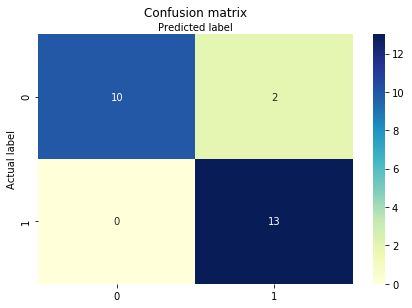

In [10]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Display the sigmoid function on the 2 last dimensions of dataset**

Firsty, verify the coeficients

In [11]:
X = iris.data[50: ]
X = X[:, 2:]
logreg = LogisticRegression()
logreg.fit(X, y)
logreg.coef_, logreg.intercept_

(array([[2.77743512, 2.38548149]]), array([-17.5471049]))

Likewise,

$$ y_n = \dfrac{1}{1 + \exp \left( - \left( w_0 + w_1 x_{1n} + w_2 x_{2n} \right) \right) }, \quad \forall n = 1, \ldots, N $$

where

$$ w_0 \approx -17.547, \quad w_1 \approx 2.777 \text{ and } w_2 \approx 2.385 $$

**how about the accuracy in this case**

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state = 22)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

print("train acc: ", accuracy_score(y_train, logreg.predict(X_train)))
print("train acc: ", accuracy_score(y_test, logreg.predict(X_test)))

train acc:  0.9402985074626866
train acc:  0.9393939393939394


**assign the coeficients**

In [13]:
w1, w2 = logreg.coef_.flatten()
w0 = logreg.intercept_

w0, w1, w2

(array([-15.94537764]), 2.6550852954512405, 1.7689721225097053)

**Contourf of the sigmoid in 2D**

(1.8, 8.074999999999978, -0.5, 3.975000000000004)

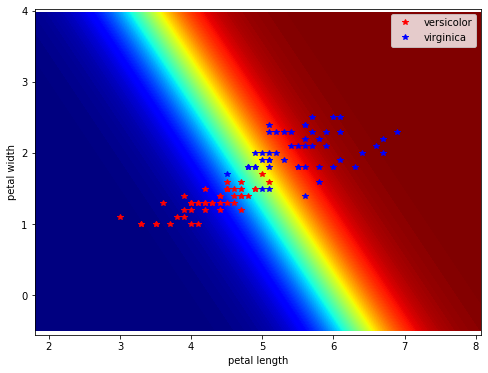

In [14]:
xm = np.arange(X[:, 0].min()-1.2, X[:, 0].max()+1.2, 0.025)
xlen = len(xm)
ym = np.arange(X[:, 1].min()-1.5, X[:, 1].max()+1.5, 0.025)
ylen = len(ym)
xm, ym = np.meshgrid(xm, ym)

def Sigmoid(s):
    return 1/(1 + np.exp(-s))

sm = w0 + w1*xm + w2*ym
zm = Sigmoid(sm)

plt.figure(figsize = (8, 6))

plt.plot(X[:, 0][: 50], X[:, 1][: 50], 'r*', label = "versicolor")
plt.plot(X[:, 0][50 :], X[:, 1][50 :], 'b*', label = "virginica")
plt.legend()
CS = plt.contourf(xm, ym, zm, 200, cmap='jet')
plt.xlim(X[:, 0].min(), X[:, 0].max())
plt.ylim(X[:, 1].min(), X[:, 1].max())
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.axis("equal")